# <span style='background :#D6DBDF ' > **Topic: Stroke Prediction**

#### Overview
1. Purpose
2. Data and python packages importing
3. Data cleaning process
4. Exploratory Data Analysis (EDA)<br>
    4.1 Categories Data<br>
    4.2 Continuous data
5. Data Preprocessing<br>
    5.1 Binary Categories (Gender and Ever Married)<br>
    5.2 Multicategory

# <font color="MidnightBlue">1. Purpose

To predict the 

# <font color="MidnightBlue">2. Data and Python packages importing

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/anyamanee/stroke_prediction/main/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bm,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# <font color="MidnightBlue">3. Data cleaning process

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bm                 4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bm                   201
smoking_status         0
stroke                 0
dtype: int64

   > จากข้อมูลทั้งหมดพบ 201 missing values ในคอลัมน์ 'bm'<br>
   > เราจึงดูรายละเอียดค่าทางสถิติของข้อมูลในคอลัมน์ 'bm' เพื่อเลือกวิธีจัดการกับ missing value

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bm,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


> จากตารางข้อมูลทางสถิติด้านบน ค่าเฉลี่ยน และค่ากลางของคอลัมน์ 'bm' มีค่าใกล้เคียงกันที่ 28.89 และ 28.01 ตามลำดับดังนั้น จึงอ้างอิงได้ข้อมูลในคอลัมน์ 'bm' มีการแจกแจงแบบปกติ เราจึงเลือกจัดการกับ missing value ด้วยค่าเฉลี่ย

In [ ]:
df.bm.mean()

28.893236911794666

In [ ]:
df_mod = df
df_mod['bm'] = df_mod['bm'].fillna(df.bm.mean())
df_mod.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bm                   0
smoking_status       0
stroke               0
dtype: int64

> จากรายละเอียดด้านบนไม่พบ missing value แล้ว<br>
> หากอ้างอิงจากตารางสถิติด้านบนในคอลัมน์ 'Age' พบว่าค่าน้อยที่สุดในคอลัมน์นั้นมีค่าน้อยกว่า 1

In [ ]:
df_check = df_mod.age[df_mod.age <1]
print(f'number of rows where the age is less than one: {len(df_check)}')
print(f'% of rows where the age is less than one: {( len(df_check)/df_mod.shape[0] )*100:.2f}%')

number of rows where the age is less than one: 43
% of rows where the age is less than one: 0.84%


> พบข้อมูล 43 แถวที่มีค่าในคอลัมน์ 'Age' น้อยกว่า 1 หรือคิดเป็นเพียง 0.84% จากข้อมูลทั้งหมดเท่านั้น ดังนั้นเราจึงเปลี่ยนค่าที่น้อยกว่า 1 ในคอลัมน์ 'Age' ให้มีค่าเป็น 1 ทั้งหมด

In [ ]:
df_mod.loc[df_mod['age'] < 1,"age"] = 1
df_mod.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bm,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.230677,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.605002,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,1.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# <font color="MidnightBlue">4. Exploratory Data Analysis (EDA)

## <font color="MidnightBlue">4.1 Categories Data

In [ ]:
header = df_mod.columns

sns.set_theme(style="darkgrid")

def plot_detail(ax1, records):
    total = len(records)
    for p in ax1.patches:
        value = '({:.0f})'.format(p.get_height())
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + 0.05 + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height() + 40
        ax1.annotate(percentage, (x, y), size = 12, ha = 'right')
        ax1.annotate(value, (x,y), size = 12)
        

def plot_category(col_name):
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1 = sns.countplot(x=col_name, data = df_mod, ax=ax1)
    ax2 = sns.countplot(x=col_name, hue ="stroke", data = df_mod, ax=ax2)

    plot_detail(ax1, df_mod[col_name])
    ax1.set_title(col_name, size = 20)
    ax1.set_xlabel(col_name, size = 15)
    ax1.set_ylabel("Number of Patient", size = 15)

    plot_detail(ax2, df_mod[col_name])
    ax2.set_title(f"{col_name} with stroke", size = 20)
    ax2.set_xlabel(col_name, size = 15)
    ax2.set_ylabel("Number of Patient", size = 15)

    plt.show()

### <font color="MidnightBlue"> Gender

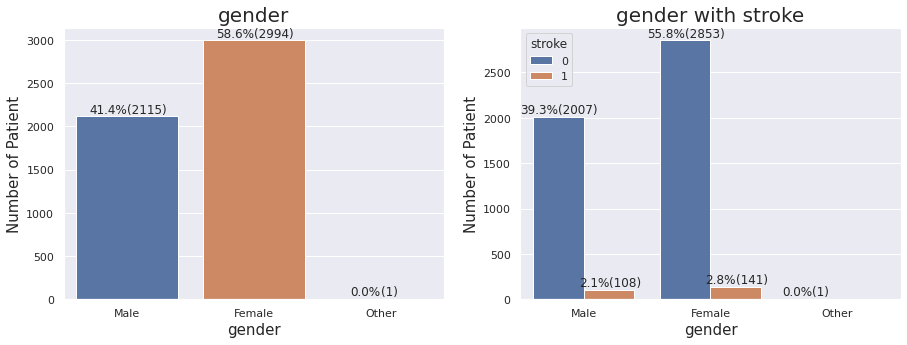

In [ ]:
plot_category("gender")

จากข้อมูลทางการแพทย์ทั้งหมด 5,110 ราย 
- พบว่ามีผู้หญิง 2,979 (58%) และผู้ชาย 2,087 (41%) โดยมีผู้หญิงมากกว่าผู้ชาย 892 คน
- จำนวผู้ป่วยโรคหลอดเลือดสมองในผู้หญิง และผู้ชายมีจำนวนใกล้เคียงคือ 141 และ 108 คนตามลำดับโดยคิดเป็น 2.8% และ 2.1% จากทั้งหมด

### <font color="MidnightBlue"> Hypertension

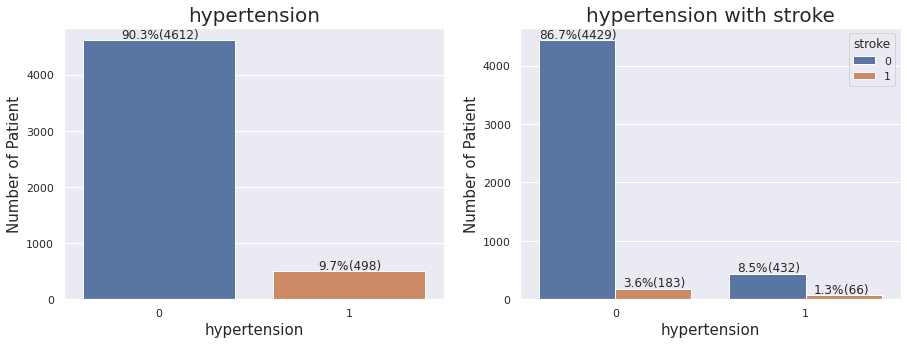

In [ ]:
plot_category("hypertension")

- จำนวนคนที่เป็น Hypertension คิดเป็น 9.7% จากจำนวนคนทั้งหมด
- 3.6% เป็นคนที่มีอาการ stroke เพียงอย่างเดียว ในขณะที่ 1.3% เป็นคนที่มมีอาการ stroke ร่วมกับ Hypertension

### <font color="MidnightBlue"> Heart Disease

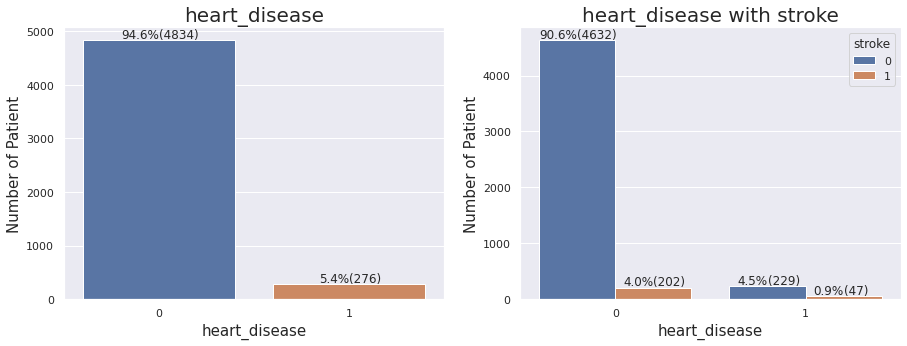

In [ ]:
plot_category("heart_disease")

- จำนวนคนที่เป็น heart disease คิดเป็น 5.4% จากจำนวนคนทั้งหมด
- 4.0% เป็นคนที่มีอาการ stroke เพียงอย่างเดียว ในขณะที่ 0.9% เป็นคนที่มีอาการ stroke ร่วมกับ heart disease

### <font color="MidnightBlue"> Work Type

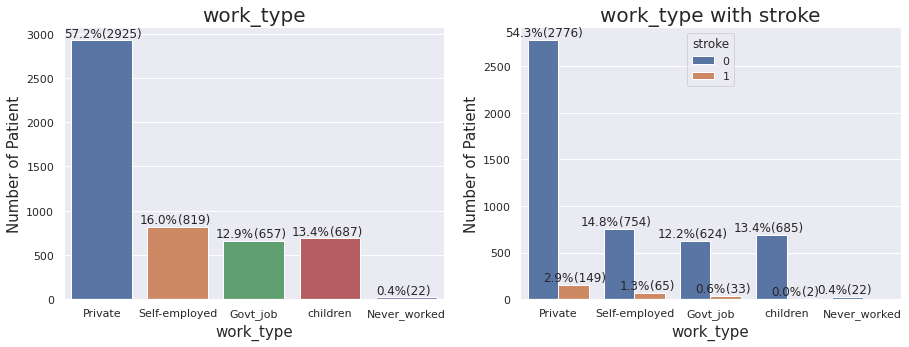

In [ ]:
plot_category("work_type")

- ผู้ป่วยส่วนใหญ่กว่า 57.2% มี working type เป็น Private
- รองลงมาคือ Self-employed 16%, Government job 12.9% และ เป็นเด็ก 12.6%
- ในส่วนของผู้ป่วยที่ไม่ได้ทำงาน และ อื่นๆ มีจำนวนเพียงแค่ประมาณ 65คน

### <font color="MidnightBlue"> Ever Married

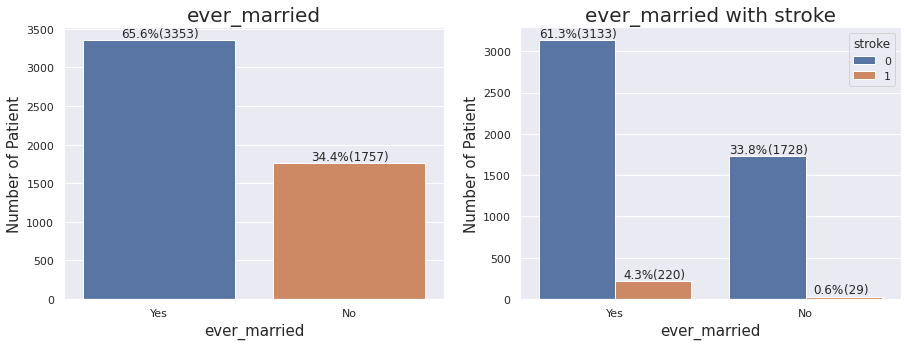

In [ ]:
plot_category("ever_married")

- จำนวนคนที่แต่งงานแล้วคิดเป็น 65.6% จากจำนวนคนทั้งหมด

### <font color="MidnightBlue"> Residence Type

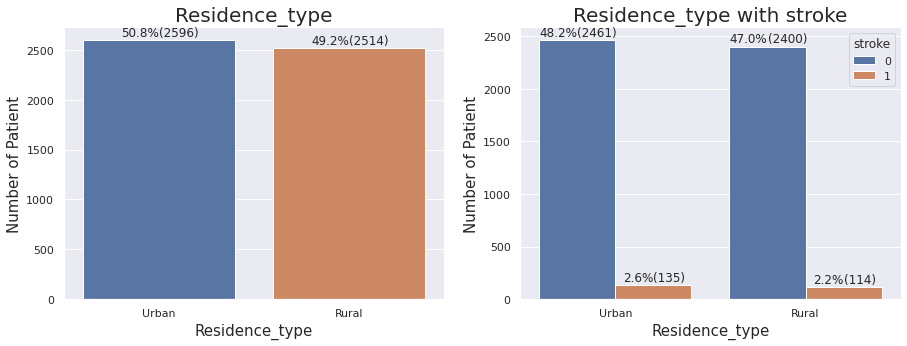

In [ ]:
plot_category("Residence_type")

- ในส่วนของประเภทที่อยู่อาศัยของผู้ป่วย หรือ Residence type นั้น แบ่งออกเป็น Urban และ Rural ในปริมาณค่อนข้างใกล้เคียงกัน

### <font color="MidnightBlue"> Smoking Satus

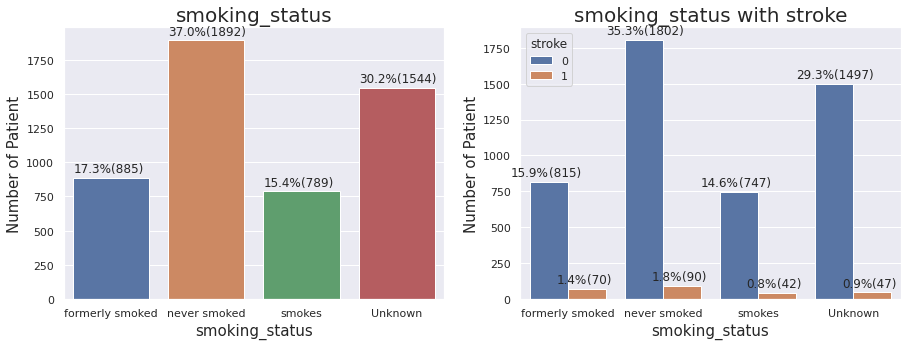

In [ ]:
plot_category("smoking_status")

- มีจำนวนผู้ป่วยที่เป็น stroke ในปริมาณที่ใก้ลเคียงกันในทุกประเภทของประวัติการสูบบุหรี่

## <font color="MidnightBlue">4.2 Continuous data

In [ ]:
def plot_continuous(col_name):
    fig, (ax1,ax2) = plt.subplots(2, figsize=(12, 10))
    sns.histplot(df_mod[df_mod['stroke'] == 0][col_name],bins=20, ax=ax1) # No Stroke - green
    sns.histplot(df_mod[df_mod['stroke'] == 1][col_name], color='chocolate',bins=20, ax=ax1) # Stroke - Red
    sns.boxplot(x=col_name, y = 'stroke', data = df_mod, hue_order=[0,1] , ax=ax2, orient='h')

    plt.title(f'No Stroke vs Stroke by {col_name}', fontsize=15)
    plt.show()

### <font color="MidnightBlue"> Avg Glucose Level

In [ ]:
df_mod.groupby("stroke")["avg_glucose_level"].describe()

,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
0,4861.0,104.795513,43.846069,55.12,77.12,91.47,112.83,267.76
1,249.0,132.544739,61.921056,56.11,79.79,105.22,196.71,271.74


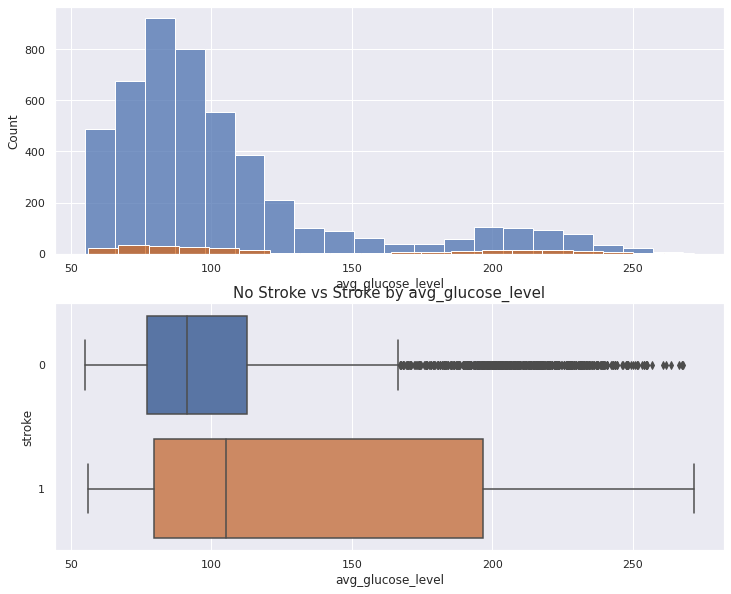

In [ ]:
plot_continuous(header[8]) #Glucose

- Median ของปริมาณ glucose ในคนที่เป็น และ ไม่เป็น มีปริมาณใกล้เคียงกันที่ 91.47 และ 105.22 ตามลำดับ
- แต่ส่วนของคนที่มีอาการเป็น stroke มีการกระจายตัวมากกว่าคนที่ไม่เป็น โดยมีค่าระดับน้ำตาลในเลือดเฉลี่ยอยู่ในช่วงประมาณ 55 ถึง 130 ซึ่งเป็นการกระจายตัวจะมีลักษณะเป็น right skewed

### <font color="MidnightBlue"> BMI

In [ ]:
df_mod.groupby("stroke")["bm"].describe()

,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
0,4861.0,28.825388,7.776203,10.3,23.6,28.300000,32.8,97.6
1,249.0,30.217789,5.825589,16.9,27.0,28.893237,32.5,56.6


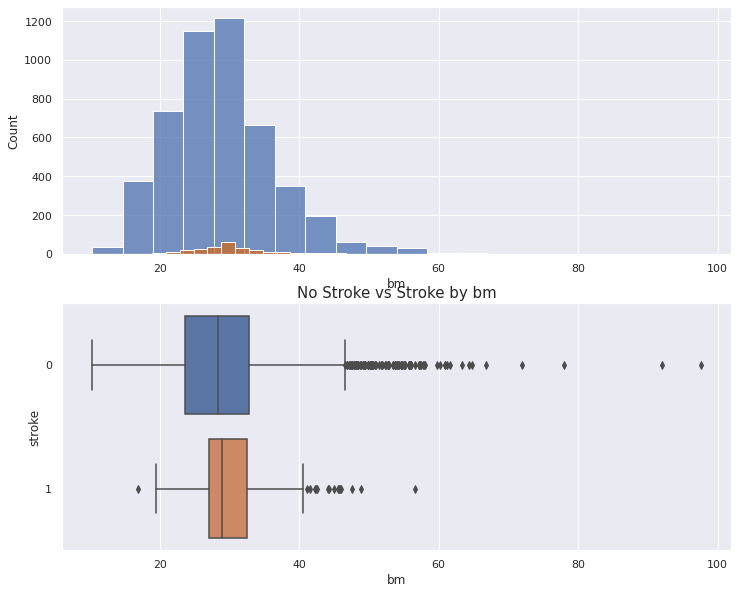

In [ ]:
plot_continuous(header[9]) #BMI

- ค่า BMI ของคนที่เป็น และ ไม่เป็น มีแนวโน้มไปในทางเดียวกัน

### <font color="MidnightBlue"> Age

In [ ]:
df_mod.groupby("stroke")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
0,4861.0,41.975816,22.284029,1.00,24.0,43.0,59.0,82.0
1,249.0,67.728193,12.727419,1.32,59.0,71.0,78.0,82.0


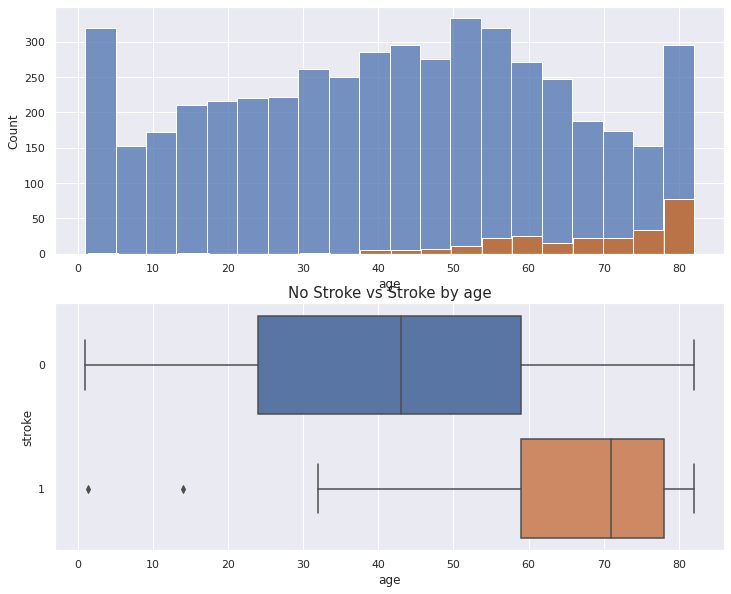

In [ ]:
plot_continuous(header[2]) #Age

- ผู้ป่วยโรคหลอดเลือดสมองส่วนใหญ่จะเป็นผู้สูงอายุ หรือหากสังเกตุจากกราฟจะเริ่มพบผู้ป่วยโรคนี้ตั้งแต่อายุ 40 ปีขึ้นไป
- จาก boxplot การกระจายตัวของผู้ป่วยที่เป็น stroke อยู่ในช่วงอายุ มากกว่า 60 ปีขึ้นไป

# <font color="MidnightBlue">5. Data Preprocessing

In [ ]:
df_preProcess = df_mod

In [ ]:
df_check = df_preProcess.gender[df_preProcess.gender =='Other']
print(f'number of rows where the age is less than one: {len(df_check)}')
print(f'% of rows where the age is less than one: {( len(df_check)/df_preProcess.shape[0] )*100:.2f}%')

df_preProcess = df_preProcess.loc[df_mod.gender !='Other'] # drop 1 row of gender "Other"

number of rows where the age is less than one: 1
% of rows where the age is less than one: 0.02%


## <font color="MidnightBlue">5.1 Binary Categories (Gender and Ever Married)

In [ ]:
idx_gender={"Female":0,"Male":1} 
df_preProcess.gender =df_preProcess.gender.apply(lambda x:idx_gender[x])

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
idx_married={"No":0,"Yes":1}
df_preProcess.ever_married = df_preProcess.ever_married.apply(lambda x:idx_married[x])

In [ ]:
set(df_preProcess.ever_married)

{0, 1}

In [ ]:
df_preProcess.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   int64  
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   int64  
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bm                 5109 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 518.9+ KB


## <font color="MidnightBlue">5.2 Multicategory

In [ ]:
idx_multiClassData = pd.get_dummies(df_preProcess[["work_type","Residence_type",'smoking_status']], prefix=['worktype','Residencetype','smokingstatus'])
print(idx_multiClassData.head())

   worktype_Govt_job  worktype_Never_worked  worktype_Private  \
0                  0                      0                 1   
1                  0                      0                 0   
2                  0                      0                 1   
3                  0                      0                 1   
4                  0                      0                 0   

   worktype_Self-employed  worktype_children  Residencetype_Rural  \
0                       0                  0                    0   
1                       1                  0                    1   
2                       0                  0                    1   
3                       0                  0                    0   
4                       1                  0                    1   

   Residencetype_Urban  smokingstatus_Unknown  smokingstatus_formerly smoked  \
0                    1                      0                              1   
1                    0            

In [ ]:
df_preProcess= pd.concat([df_preProcess,idx_multiClassData], axis=1)

In [ ]:
df_preProcess.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bm,...,worktype_Never_worked,worktype_Private,worktype_Self-employed,worktype_children,Residencetype_Rural,Residencetype_Urban,smokingstatus_Unknown,smokingstatus_formerly smoked,smokingstatus_never smoked,smokingstatus_smokes
0,9046,1,67.0,0,1,1,Private,Urban,228.69,36.600000,...,0,1,0,0,0,1,0,1,0,0
1,51676,0,61.0,0,0,1,Self-employed,Rural,202.21,28.893237,...,0,0,1,0,1,0,0,0,1,0
2,31112,1,80.0,0,1,1,Private,Rural,105.92,32.500000,...,0,1,0,0,1,0,0,0,1,0
3,60182,0,49.0,0,0,1,Private,Urban,171.23,34.400000,...,0,1,0,0,0,1,0,0,0,1
4,1665,0,79.0,1,0,1,Self-employed,Rural,174.12,24.000000,...,0,0,1,0,1,0,0,0,1,0


In [ ]:
# Write Dataframe After pre process
df_Final = df_preProcess.drop(columns=['work_type', 'Residence_type', 'smoking_status'])
df_Final.head()

df_Final.to_csv("StrokeData_Final.csv", index=False)

# Correlation

In [ ]:
# Data Encoding: 
#1. Categorical

#2. Label



In [ ]:
# Splitting the dataset into the Training set and Test set

In [ ]:
# Handling Imbalance data using SMOTE

In [ ]:
# Model Selection

In [ ]:
# Keras ANN

[1] https://www.kaggle.com/code/siddheshera/stroke-eda-smote-9-models-90-accuracy
[2] https://www.kaggle.com/code/joshuaswords/predicting-a-stroke-shap-lime-explainer-eli5
[3]https://www.kaggle.com/code/bhuvanchennoju/data-storytelling-auc-focus-on-strokes

## Correlation

In [ ]:
# Change column position
old_cols = df_Final.columns.values 
new_cols= ['id', 'gender', 'hypertension', 'heart_disease',
       'ever_married', 'avg_glucose_level', 'bm', 
       'worktype_Govt_job', 'worktype_Never_worked', 'worktype_Private',
       'worktype_Self-employed', 'worktype_children',
       'Residencetype_Rural', 'Residencetype_Urban',
       'smokingstatus_Unknown', 'smokingstatus_formerly smoked',
       'smokingstatus_never smoked', 'smokingstatus_smokes', 'age', 'stroke']
df_Final = df_Final.reindex(columns=new_cols)
cols = df_Final.columns.values 


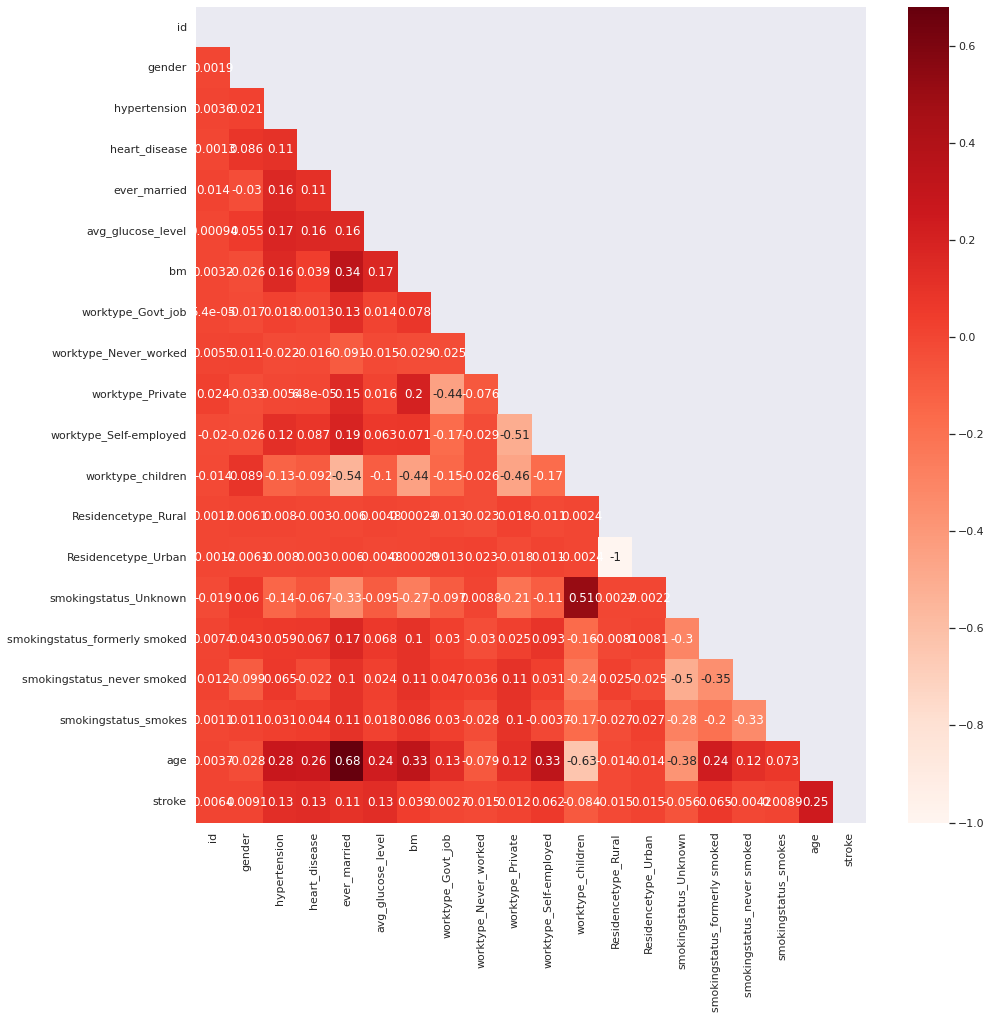

correlated features > 0.1 :
hypertension         0.127891
heart_disease        0.134905
ever_married         0.108299
avg_glucose_level    0.131991
age                  0.245281
stroke               1.000000
Name: stroke, dtype: float64


In [ ]:
#Using Pearson Correlation
# Compute the correlation matrix
plt.figure(figsize=(15,15))
cor = df_Final.corr()

mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(cor,mask =mask, annot=True, cmap=plt.cm.Reds)
plt.show()

#Correlation with output variable
cor_target = abs(cor["stroke"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
print(f'correlated features > 0.1 :\n{relevant_features}')

In [ ]:
x = df_Final.iloc[:, 1:-1].values
y = df_Final.iloc[:, -1].values

In [ ]:
x

array([[ 1.,  0.,  1., ...,  0.,  0., 67.],
       [ 0.,  0.,  0., ...,  1.,  0., 61.],
       [ 1.,  0.,  1., ...,  1.,  0., 80.],
       ...,
       [ 0.,  0.,  0., ...,  1.,  0., 35.],
       [ 1.,  0.,  0., ...,  0.,  0., 51.],
       [ 0.,  0.,  0., ...,  0.,  0., 44.]])

In [ ]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
# Train 80: Test 20
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

In [ ]:
print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions x_train dataset:  (4087, 18)
Number transactions y_train dataset:  (4087,)
Number transactions x_test dataset:  (1022, 18)
Number transactions y_test dataset:  (1022,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler 
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 195
Before OverSampling, counts of label '0': 3892 

After OverSampling, the shape of train_X: (7784, 18)
After OverSampling, the shape of train_y: (7784,) 

After OverSampling, counts of label '1': 3892
After OverSampling, counts of label '0': 3892


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
# correlation between test harness and ideal test condition
from numpy import mean
from numpy import isnan
from numpy import asarray
from numpy import polyfit
from scipy.stats import pearsonr
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
 
 
# get a list of models to evaluate
def get_models():
    models = list()
    models.append(LogisticRegression())
    models.append(RidgeClassifier())
    models.append(SGDClassifier())
    models.append(KNeighborsClassifier())
    models.append(DecisionTreeClassifier())
    models.append(ExtraTreeClassifier())
    models.append(LinearSVC())
    models.append(SVC())
    models.append(RandomForestClassifier())
    return models
 
# evaluate the model using a given test condition
def evaluate_model(cv, model):
    # get the dataset
    #X, y = get_dataset()
    # evaluate the model
    scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # return scores
    return mean(scores)
 

x_train, x_test, y_train, y_test

In [ ]:
# define test conditions
cv = KFold(n_splits=5, shuffle=True, random_state=1)
# get the list of models to consider
models = get_models()
# collect results
cv_results = list()
model_results = list()
# evaluate each model
for model in models:
    # evaluate model using each test condition
    cv_mean = evaluate_model(cv, model)
    # check for invalid results
    if isnan(cv_mean):
        continue
    # store results
    cv_results.append(cv_mean)
    model_results.append(model)
    # summarize progress
    print('>%s:, cv=%.3f' % (type(model).__name__, cv_mean))
    # calculate the correlation between each test condition

CVresults_df = pd.DataFrame()
CVresults_df['Model'] = model_results
CVresults_df['ACC_results'] = cv_results

>LogisticRegression:, cv=0.951
>RidgeClassifier:, cv=0.951
>SGDClassifier:, cv=0.826
>KNeighborsClassifier:, cv=0.944
>DecisionTreeClassifier:, cv=0.913
>ExtraTreeClassifier:, cv=0.907
>LinearSVC:, cv=0.951
>SVC:, cv=0.951
>RandomForestClassifier:, cv=0.950


In [ ]:
CVresults_df

,Model,ACC_results
0,LogisticRegression(),0.951458
1,RidgeClassifier(),0.951262
2,SGDClassifier(),0.826214
3,KNeighborsClassifier(),0.944216
4,DecisionTreeClassifier(),0.912704
5,ExtraTreeClassifier(),0.907420
6,LinearSVC(),0.951262
7,SVC(),0.951262
8,RandomForestClassifier(),0.950283


In [ ]:
#  Features Selection

In [ ]:
#LogisticRegression()

In [ ]:
#RidgeClassifier()

In [ ]:
#RandomForestClassifier()	

In [ ]:
#SVC()

In [ ]:
#LinearSVC()

In [112]:
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy, precision, recall, f1 = {}, {}, {}, {}

from sklearn.preprocessing import MinMaxScaler 
sc = MinMaxScaler()

for key in models:
  key= Pipeline([('scaler',sc),('clf',key)])
  # Fit the classifier model
  key.fit(x_train, y_train)

  # Prediction 
  predictions = key.predict(x_test)

  # Calculate Accuracy, Precision and Recall Metrics
  accuracy[key] = accuracy_score(predictions,y_test)
  precision[key] = precision_score(predictions,y_test)
  recall[key] = recall_score(predictions, y_test)
  f1[key] = f1_score(predictions, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to 

In [116]:
f1

{Pipeline(steps=[('scaler', MinMaxScaler()), ('clf', LogisticRegression())]): 0.0,
 Pipeline(steps=[('scaler', MinMaxScaler()), ('clf', RidgeClassifier())]): 0.0,
 Pipeline(steps=[('scaler', MinMaxScaler()), ('clf', SGDClassifier())]): 0.0,
 Pipeline(steps=[('scaler', MinMaxScaler()), ('clf', KNeighborsClassifier())]): 0.06666666666666667,
 Pipeline(steps=[('scaler', MinMaxScaler()), ('clf', DecisionTreeClassifier())]): 0.125,
 Pipeline(steps=[('scaler', MinMaxScaler()), ('clf', ExtraTreeClassifier())]): 0.125,
 Pipeline(steps=[('scaler', MinMaxScaler()), ('clf', LinearSVC())]): 0.0,
 Pipeline(steps=[('scaler', MinMaxScaler()), ('clf', SVC())]): 0.0,
 Pipeline(steps=[('scaler', MinMaxScaler()), ('clf', RandomForestClassifier())]): 0.03508771929824561}

In [118]:
import pandas as pd

df_model = pd.DataFrame(index=models, columns=['Accuracy', 'Precision', 'Recall', 'F1'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['F1'] = f1.values()

df_model

Accuracy  Precision  \
LogisticRegression()                                0.947162   0.000000   
RidgeClassifier()                                   0.947162   0.000000   
SGDClassifier()                                     0.947162   0.000000   
KNeighborsClassifier()                              0.945205   0.037037   
DecisionTreeClassifier()                            0.904110   0.129630   
ExtraTreeClassifier()                               0.904110   0.129630   
LinearSVC()                                         0.947162   0.000000   
SVC()                                               0.947162   0.000000   
(DecisionTreeClassifier(max_features='auto', ra...  0.946184   0.018519   

                                                      Recall        F1  
LogisticRegression()                                0.000000  0.000000  
RidgeClassifier()                                   0.000000  0.000000  
SGDClassifier()                                     0.000000  0.000000  
KNeighborsClassifier()                              0.333333  0.066667  
DecisionTreeClassifier()                            0.120690  0.125000  
ExtraTreeClassifier()                               0.120690  0.125000  
LinearSVC()                                         0.000000  0.000000  
SVC()                                               0.000000  0.000000  
(DecisionTreeClassifier(max_features='auto', ra...  0.333333  0.035088

In [117]:
models

[LogisticRegression(),
 RidgeClassifier(),
 SGDClassifier(),
 KNeighborsClassifier(),
 DecisionTreeClassifier(),
 ExtraTreeClassifier(),
 LinearSVC(),
 SVC(),
 RandomForestClassifier()]